**Importing Required Libraries**

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

**Loading Dataset**


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/car_data.csv")
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1],
                                                    dataset.iloc[:, -1],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 185 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       210 non-null    object 
 1   Year           210 non-null    int64  
 2   Selling_Price  210 non-null    float64
 3   Present_Price  210 non-null    float64
 4   Driven_kms     210 non-null    int64  
 5   Fuel_Type      210 non-null    object 
 6   Selling_type   210 non-null    object 
 7   Transmission   210 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 14.8+ KB


**Splitting Features and Labels**

In [17]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

**Explore the various cars in the dataset.**

In [8]:
X_train_with_name = dataset.iloc[:, :-1]
X_train_with_name["Car_Name"].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda Activa 125,1
Hero Hunk,1
Hero Ignitor Disc,1


**Manufacturer Extraction from Car_Name**

In [9]:
make_train = X_train["Car_Name"].str.split(" ", expand=True)
make_test = X_test["Car_Name"].str.split(" ", expand=True)
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

**Dropping Car_Name**

In [10]:
X_train = X_train.drop("Car_Name", axis=1)
X_test = X_test.drop("Car_Name", axis=1)

**Plotting Manufacturer Count**

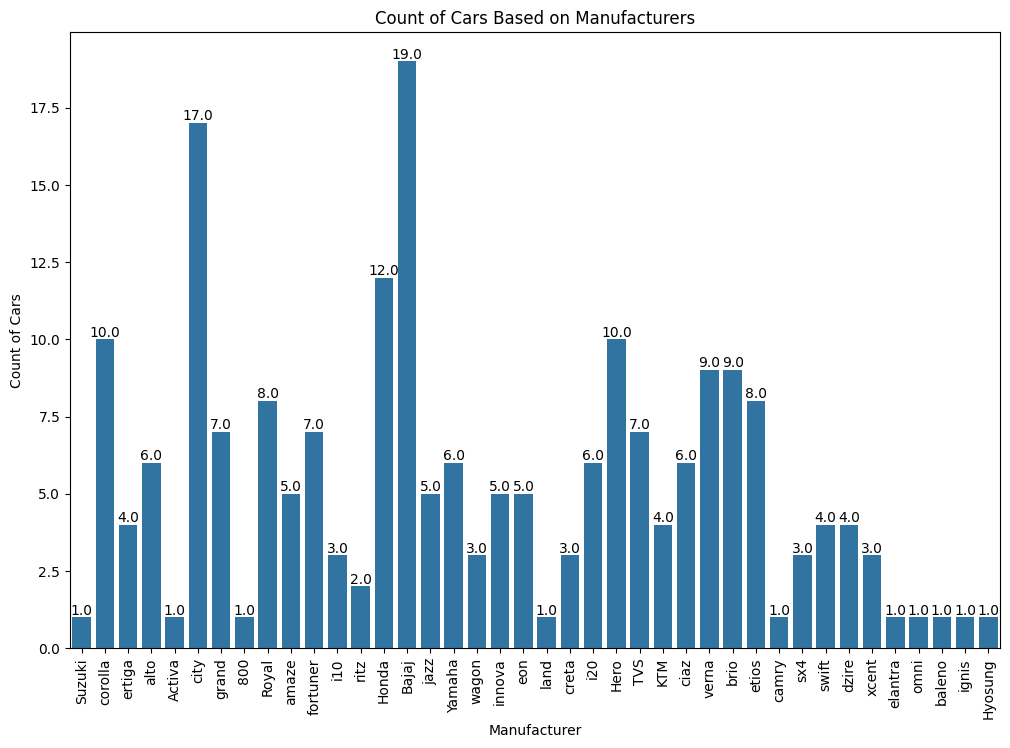

In [11]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(x='Manufacturer', data=X_train)
plt.xticks(rotation=90)

for p in plot.patches:
    plot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2.0, p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 5), textcoords='offset points')

plt.title("Count of Cars Based on Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of Cars")
plt.show()

In [12]:
if 'Car_Name' in X_train.columns:
    X_train.drop("Car_Name", axis=1, inplace=True)
if 'Car_Name' in X_test.columns:
    X_test.drop("Car_Name", axis=1, inplace=True)

**Converting Year to Car Age**

In [13]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [14]:
print("Before:")
print(X_train['Year'].head())

Before:
185    17
72     12
15      9
10      8
196    17
Name: Year, dtype: int64


In [15]:
print("After (Car Age):")
print(X_test['Year'].head())

After (Car Age):
177     9
289     9
228    13
198    14
60     12
Name: Year, dtype: int64


**Kilometers_Driven**

In [16]:
X_train["Driven_kms"]

,Driven_kms
185,1900
72,56001
15,43000
10,2135
196,500000
...,...
188,18000
71,45000
106,16500
270,69341


**One-Hot Encoding (Convert categorical to numeric)**

In [18]:
combined = pd.concat([X_train, X_test], axis=0)

combined = pd.get_dummies(combined, columns=["Fuel_Type", "Selling_type", "Transmission", "Manufacturer"], drop_first=True)

X_train = combined.iloc[:X_train.shape[0], :]
X_test = combined.iloc[X_train.shape[0]:, :]


**Feature Scaling**

In [19]:
scaler = StandardScaler()
num_cols = ['Present_Price', 'Driven_kms', 'Year']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

/tmp/ipython-input-19-3510282777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
/tmp/ipython-input-19-3510282777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = scaler.transform(X_test[num_cols])


**Train Linear Regression Model**

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression R² Score: -0.1246078156919801


**Train Random Forest Regressor**

In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

Random Forest R² Score: -0.6145853932584273


**Plot Actual vs Predicted**

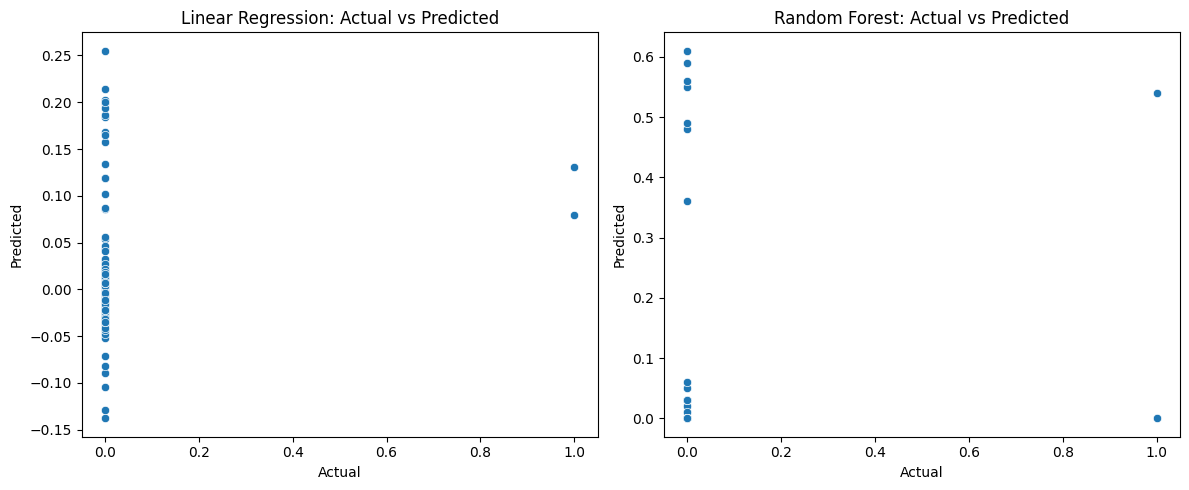

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()